In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import matplotlib as mpl

## QDA & LDA
- QDA : quadratic dscriminatn analysis
- LDA : linear discriminant analysis
- 대표적인 확률론적 생성 모형(probabilistic generative model)
- y의 클래스 값에 따른 x의 분포에 대한 정보를 먼저 알아낸 후, 베이즈 정리를 사용하여 주어진 x에 대한 y의 확률 분포를 찾아낸다.\

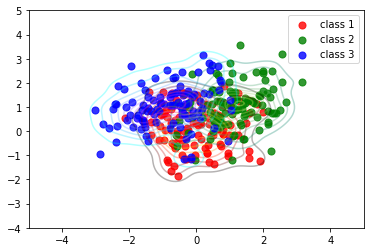

In [7]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0], [0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [12]:
iris = load_iris()

In [57]:
dfX0 = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target,columns=['y'])

In [58]:
dfX0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
dfy.head()

,y
0,0
1,0
2,0
3,0
4,0


In [16]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(dfX0,dfy)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_true = dfy.values
y_pred = qda.predict(dfX0)

In [24]:
confusion_matrix(y_true,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [63]:
lda = LinearDiscriminantAnalysis(store_covariance=True).fit(dfX0,dfy)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
y_true = dfy.values
y_pred = qda.predict(dfX0)

In [65]:
confusion_matrix(y_true,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])